## Books Recommendatoin 

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [33]:
df = pd.read_csv("bookss.csv")

In [34]:
print(df)

                            Title              Author              Genre  \
0        Fundamentals of Wavelets    Goswami, Jaideva  signal_processing   
1                      Data Smart       Foreman, John       data_science   
2        God Created the Integers    Hawking, Stephen        mathematics   
3               Superfreakonomics     Dubner, Stephen          economics   
4                     Orientalism        Said, Edward            history   
..                            ...                 ...                ...   
206      Structure and Randomness        Tao, Terence        mathematics   
207  Image Processing with MATLAB       Eddins, Steve  signal_processing   
208                   Animal Farm      Orwell, George            fiction   
209                    Idiot, The  Dostoevsky, Fyodor            fiction   
210            Christmas Carol, A    Dickens, Charles            fiction   

     Height      Publisher  
0       228          Wiley  
1       235          Wiley  


In [36]:
num_lines

271380

In [37]:
size

11500000

In [38]:
df.head()

,Title,Author,Genre,Height,Publisher
0,Fundamentals of Wavelets,"Goswami, Jaideva",signal_processing,228,Wiley
1,Data Smart,"Foreman, John",data_science,235,Wiley
2,God Created the Integers,"Hawking, Stephen",mathematics,197,Penguin
3,Superfreakonomics,"Dubner, Stephen",economics,179,HarperCollins
4,Orientalism,"Said, Edward",history,197,Penguin


In [39]:
df.tail()

,Title,Author,Genre,Height,Publisher
206,Structure and Randomness,"Tao, Terence",mathematics,252,NaN
207,Image Processing with MATLAB,"Eddins, Steve",signal_processing,241,NaN
208,Animal Farm,"Orwell, George",fiction,180,NaN
209,"Idiot, The","Dostoevsky, Fyodor",fiction,197,NaN
210,"Christmas Carol, A","Dickens, Charles",fiction,196,NaN


### Info. on the data

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      211 non-null    object
 1   Author     187 non-null    object
 2   Genre      211 non-null    object
 3   Height     211 non-null    int64 
 4   Publisher  115 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


### Statistical info.

In [41]:
df.describe()

,Height
count,211.000000
mean,206.056872
std,26.828141
min,160.000000
25%,180.000000
50%,199.000000
75%,229.500000
max,283.000000


### Check for null values

In [42]:
df.isnull().sum()

Title         0
Author       24
Genre         0
Height        0
Publisher    96
dtype: int64

In [43]:
df.drop(['Publisher'], axis=1, inplace=True)

In [45]:
df['Author'].unique()

array(['Goswami, Jaideva', 'Foreman, John', 'Hawking, Stephen',
       'Dubner, Stephen', 'Said, Edward', 'Vapnik, Vladimir',
       'Menon, V P', 'Mlodinow, Leonard', 'Shih, Frank',
       'Konnikova, Maria', 'Sebastian Gutierrez', 'Vonnegut, Kurt',
       'Villani, Cedric', 'Sussman, Gerald', 'Eraly, Abraham',
       'Kafka, Frank', 'Pratt, John', 'Nisbet, Robert', 'Wells, H. G.',
       'Heisenberg, Werner', 'Oram, Andy', 'Tao, Terence', 'Conway, Drew',
       'Silver, Nate', 'McKinney, Wes', 'Cormen, Thomas',
       'Deb, Siddhartha', 'Camus, Albert', 'Doyle, Arthur Conan',
       'Smith, Adam', 'Follett, Ken', 'Hitler, Adolf', 'Capra, Fritjof',
       'Feynman, Richard', 'Hemingway, Ernest', 'Forsyth, Frederick',
       'Archer, Jeffery', 'Pausch, Randy', 'Rand, Ayn',
       'Crichton, Michael', 'Steinbeck, John', 'Poe, Edgar Allen',
       'Durant, Will', 'Deshpande, P L', 'Grisham, John',
       'Naipaul, V. S.', 'Heller, Joseph', 'BBC', 'Dylan, Bob',
       'Gupta, Madan', 'Sto

In [46]:
df['Author'].mode()

0    Steinbeck, John
Name: Author, dtype: object

In [49]:
df.isnull().sum()

Title      0
Author    24
Genre      0
Height     0
dtype: int64

In [50]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 4)


### Dropping the duplicates

In [51]:
df = df.drop_duplicates()
df.head()

,Title,Author,Genre,Height
0,Fundamentals of Wavelets,"Goswami, Jaideva",signal_processing,228
1,Data Smart,"Foreman, John",data_science,235
2,God Created the Integers,"Hawking, Stephen",mathematics,197
3,Superfreakonomics,"Dubner, Stephen",economics,179
4,Orientalism,"Said, Edward",history,197


### Counting the number of rows after removing duplicates.

In [52]:
df.count()

Title     211
Author    187
Genre     211
Height    211
dtype: int64

In [58]:
df.dtypes

Title     object
Author    object
Genre     object
Height     int64
dtype: object

### Outlier detection

<AxesSubplot:xlabel='Height'>

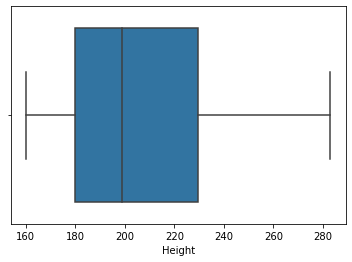

In [59]:
import seaborn as sns
sns.boxplot(x=df['Height'])

In [60]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Height    49.5
dtype: float64


### Removing outliers

In [61]:
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [62]:
df.shape

(211, 4)

### Let us plot some histograms 

In [64]:
df.head()

,Title,Author,Genre,Height
0,Fundamentals of Wavelets,"Goswami, Jaideva",signal_processing,228
1,Data Smart,"Foreman, John",data_science,235
2,God Created the Integers,"Hawking, Stephen",mathematics,197
3,Superfreakonomics,"Dubner, Stephen",economics,179
4,Orientalism,"Said, Edward",history,197


In [65]:
df.tail()

,Title,Author,Genre,Height
206,Structure and Randomness,"Tao, Terence",mathematics,252
207,Image Processing with MATLAB,"Eddins, Steve",signal_processing,241
208,Animal Farm,"Orwell, George",fiction,180
209,"Idiot, The","Dostoevsky, Fyodor",fiction,197
210,"Christmas Carol, A","Dickens, Charles",fiction,196


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 210
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   211 non-null    object
 1   Author  187 non-null    object
 2   Genre   211 non-null    object
 3   Height  211 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 8.2+ KB


array([[<AxesSubplot:title={'center':'Height'}>]], dtype=object)

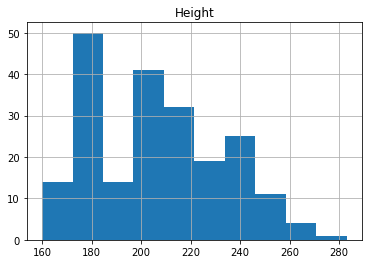

In [67]:
df.hist(column='Height')

In [69]:
df.groupby('Genre').sum()

,Height
Genre,
comic,3405
computer_science,2536
data_science,3999
economics,2072
fiction,11969
history,5186
mathematics,1148
nonfiction,6014
philosophy,3348


<AxesSubplot:xlabel='Genre'>

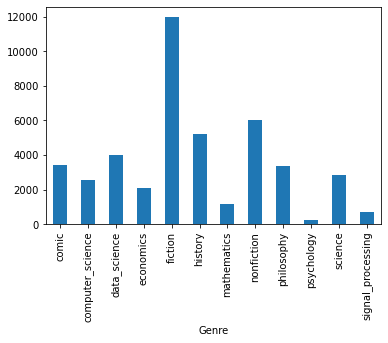

In [72]:
import matplotlib.pyplot as plt

df.groupby('Genre')['Height'].sum().plot.bar()

### Visualizing price column using distplot

<AxesSubplot:xlabel='Height', ylabel='Density'>

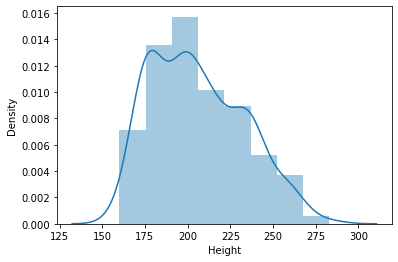

In [74]:
sns.distplot(df['Height'])

## K Means Clustering

In [76]:
from sklearn.preprocessing import LabelEncoder
  
# label_encoder object knows how to understand word labels.
label_encoder = LabelEncoder()
  
# Encode labels in column 'species'.
df['Author']= label_encoder.fit_transform(df['Author'])
df['Genre']= label_encoder.fit_transform(df['Genre'])

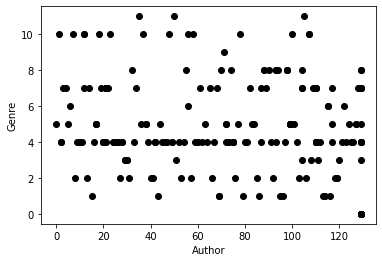

In [78]:
X = df[["Author","Genre"]]
#Visualise data points
plt.scatter(X["Author"],X["Genre"],c='black')
plt.xlabel('Author')
plt.ylabel('Genre')
plt.show()

In [79]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [80]:
y_kmeans

array([4, 4, 4, 1, 3, 2, 0, 0, 3, 0, 3, 2, 2, 2, 4, 0, 3, 0, 2, 4, 0, 2,
       1, 3, 0, 1, 1, 1, 1, 1, 3, 4, 0, 1, 4, 4, 4, 1, 3, 3, 1, 3, 3, 1,
       1, 4, 1, 3, 3, 3, 4, 0, 4, 1, 4, 4, 3, 4, 1, 2, 4, 2, 0, 3, 1, 1,
       3, 4, 3, 4, 2, 1, 0, 1, 1, 2, 1, 1, 1, 4, 2, 0, 2, 2, 2, 0, 0, 0,
       3, 3, 4, 2, 4, 4, 1, 1, 0, 3, 1, 4, 0, 3, 1, 2, 0, 0, 4, 0, 3, 4,
       3, 1, 3, 2, 3, 0, 1, 1, 2, 1, 0, 0, 1, 3, 4, 2, 1, 4, 0, 2, 2, 0,
       4, 3, 1, 4, 3, 4, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2,
       2, 3, 0, 4, 3, 1, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1, 1, 0, 3, 4, 1,
       2, 3, 3, 2, 0, 3, 1, 1, 3, 0, 3, 3, 3, 2, 1, 1, 0, 3, 1, 1, 2, 2,
       0, 0, 3, 0, 0, 0, 2, 2, 2, 4, 0, 1, 1])

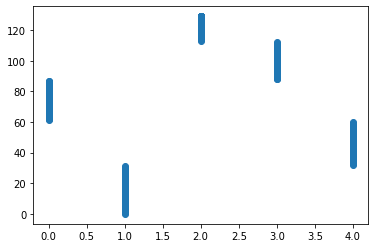

In [82]:
plt.scatter(y_kmeans, df['Author'])